# Описание задачи

Датасет содержит 236378 записей о пациентах, имеющих предиабетный или диабетный статус и не имеющих диабета. Задача: по имеющимся признакам (таким как имт, уровень холестерина, образ жизни и привычки, доходы, образования, пол и др.) предсказать, к какому классу относится пациент: имеющий предиабет или диабет, или не имеющий.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.columns = dataset.columns.str.strip()

In [4]:
dataset.shape

(236378, 22)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

**Diabetes_binary** — статус(диабет и предиабет или не диабет)\
**HighBP** — большие значения кровяного давление\
**HighChol** — большие значения холестерина\
**CholCheck** — проверялся ли на холестерин в течение 5 лет\
**BMI** — индекс массы тела\
**Smoker** — выкурил ли за всю жизнь 100 сигарет\
**Stroke** — инсульт\
**HeartDiseaseorAttack** — были ли ишемическая болезнь сердца или инфаркт миокарда \
**PhysActivity** — физическая активность за последние 30 дней без учета работы \
**Fruits** — употребляете фрукты один или более раз в день\
**Veggies** — употребляете овощи один или более раз в день\
**HvyAlcoholConsump** — Сильно пьющие (взрослые мужчины, употребляющие более 14 напитков в неделю, и взрослые женщины, употребляющие более 7 напитков в неделю)\
**AnyHealthcare** — имеется ли любая медицинская страховка\
**NoDocbcCost** — отказ от посещения врача из-за дороговизны в течение 12 месяцев\
**GenHlth** — общая оценка здоровья (от 1 до 5, 1 - превосходно, 5 - ужасно)\
**MentHlth** — количество дней в течение последних 30, когда пациент чувствовал себя плохо (стресс, депрессия и проблемы с эмоциями)\
**PhysHlth** — количество дней в течение последних 30, когда пациент чувствовал себя плохо (физические заболевания и травмы)\
**DiffWalk** — испытывает ли серьезные трудности при ходьбе или подъеме по лестнице?\
**Sex** — пол (0 - женщина)\
**Age** — возраст (шкала 1-13: 1 = 18-24, 8 = 55-59, 13 = 80 или старше; подробнее в 21.pdf AGEG5YR)\
**Education** — уровень образования (шкала 1-6: 1 = Никогда не посещали школу или только детский сад, 2 = начальная школа, 3 = среднее общее, 4 - среднее полное, 5 - неоконченный вуз или колледж, 6 - оконченный вуз или колледж)\
**Income** — уровень доходов (шкала 1 = меньше 10,000, 5 = меньше 35,000, 11 = 200,000 или больше (в долларах США); подробнее в 21.pdf INCOME3)

In [6]:
dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


# Корреляционная матрица

In [7]:
dataset.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.260338,0.197046,0.068585,0.200783,0.056982,0.101557,0.175338,-0.147951,-0.028694,...,0.027671,0.013320,0.278851,0.036099,0.160067,0.209561,0.034585,0.190946,-0.102297,-0.151469
HighBP,0.260338,1.000000,0.283285,0.099415,0.213951,0.099570,0.126594,0.203191,-0.132253,-0.031542,...,0.049833,-0.007477,0.281555,0.011743,0.140946,0.208262,0.067557,0.345390,-0.106342,-0.150292
HighChol,0.197046,0.283285,1.000000,0.098558,0.087188,0.082402,0.085947,0.170668,-0.076648,-0.024408,...,0.056505,-0.012307,0.187101,0.019851,0.104846,0.127667,0.029081,0.287937,-0.035434,-0.068196
CholCheck,0.068585,0.099415,0.098558,1.000000,0.036226,-0.012874,0.025386,0.043867,-0.008454,0.024951,...,0.154640,-0.071406,0.042176,-0.015560,0.031339,0.044966,-0.048143,0.102707,0.030341,0.021765
BMI,0.200783,0.213951,0.087188,0.036226,1.000000,0.016289,0.010241,0.039518,-0.163979,-0.089897,...,-0.009609,0.048165,0.254835,0.088455,0.120976,0.199165,0.007928,-0.050161,-0.098964,-0.102487
Smoker,0.056982,0.099570,0.082402,-0.012874,0.016289,1.000000,0.057064,0.111283,-0.093729,-0.071277,...,-0.023686,0.046932,0.166432,0.084626,0.113428,0.123640,0.073719,0.123354,-0.178179,-0.148127
Stroke,0.101557,0.126594,0.085947,0.025386,0.010241,0.057064,1.000000,0.177667,-0.078759,-0.000428,...,0.015463,0.021849,0.159723,0.045176,0.131955,0.162562,0.001288,0.128892,-0.061672,-0.115004
HeartDiseaseorAttack,0.175338,0.203191,0.170668,0.043867,0.039518,0.111283,0.177667,1.000000,-0.097710,-0.006846,...,0.025104,0.014479,0.239646,0.034660,0.170468,0.194299,0.085596,0.223501,-0.080808,-0.124740
PhysActivity,-0.147951,-0.132253,-0.076648,-0.008454,-0.163979,-0.093729,-0.078759,-0.097710,1.000000,0.118245,...,0.024926,-0.050100,-0.284207,-0.116034,-0.248385,-0.284294,0.058629,-0.119369,0.211932,0.239828
Fruits,-0.028694,-0.031542,-0.024408,0.024951,-0.089897,-0.071277,-0.000428,-0.006846,0.118245,1.000000,...,0.019495,-0.029629,-0.082256,-0.058411,-0.032673,-0.029691,-0.053992,0.071838,0.087289,0.053229


Пропущенные значения:

In [8]:
dataset.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Повторяющиеся значения:

In [9]:
dataset.duplicated().sum()

13135

In [10]:
dataset.drop_duplicates(inplace= True)
dataset.duplicated().sum()

0

# Медианные значения

In [11]:
dataset.median(axis = 0)

Diabetes_binary          0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     28.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

# Обработка категориальных признаков

In [12]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,223243.00000,223243.000000,223243.000000,223243.00000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,...,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000
mean,0.14959,0.431642,0.410812,0.96145,29.134414,0.426213,0.041175,0.091174,0.766864,0.607643,...,0.960424,0.067478,2.527385,4.159127,3.969688,0.162836,0.475840,7.868592,5.103515,6.832017
std,0.35667,0.495306,0.491982,0.19252,6.646068,0.494527,0.198695,0.287857,0.422829,0.488277,...,0.194961,0.250849,1.028733,8.055095,8.432426,0.369217,0.499417,3.257768,0.952150,2.378397
min,0.00000,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,0.000000,1.00000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.00000,0.000000,0.000000,1.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.00000,1.000000,1.000000,1.00000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.00000,1.000000,1.000000,1.00000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [13]:
dataset = pd.get_dummies(dataset)

# Визуализация данных

Видно, что в максимальном значении для имт 99. Проверим записи с имт > 60.

In [14]:
dataset[dataset['BMI'] > 60]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1075,1.0,1,0.0,1,61.0,0.0,0.0,1.0,1,1,...,0,0.0,3.0,0.0,0.0,0.0,0,5,6.0,1.0
1182,1.0,1,0.0,1,63.0,0.0,0.0,0.0,0,0,...,1,1.0,5.0,30.0,10.0,1.0,0,2,3.0,5.0
1206,0.0,0,0.0,1,63.0,0.0,0.0,0.0,0,1,...,1,0.0,5.0,30.0,30.0,1.0,0,7,5.0,5.0
1775,0.0,1,0.0,1,68.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,7.0,7.0,1.0,0,6,3.0,1.0
2905,1.0,1,1.0,1,62.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,6.0,3.0,1.0,1,6,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232148,1.0,1,1.0,1,68.0,1.0,0.0,0.0,0,1,...,1,1.0,5.0,10.0,30.0,1.0,0,9,5.0,7.0
233264,0.0,0,0.0,1,61.0,0.0,0.0,0.0,0,0,...,1,0.0,1.0,0.0,0.0,0.0,0,4,5.0,1.0
233929,1.0,1,0.0,1,61.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,5.0,5.0,1.0,0,8,4.0,2.0
235174,0.0,1,0.0,1,70.0,1.0,0.0,0.0,0,0,...,1,1.0,1.0,30.0,0.0,1.0,1,4,5.0,1.0


In [15]:
dataset[dataset['BMI'] > 10].describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,223243.00000,223243.000000,223243.000000,223243.00000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,...,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000,223243.000000
mean,0.14959,0.431642,0.410812,0.96145,29.134414,0.426213,0.041175,0.091174,0.766864,0.607643,...,0.960424,0.067478,2.527385,4.159127,3.969688,0.162836,0.475840,7.868592,5.103515,6.832017
std,0.35667,0.495306,0.491982,0.19252,6.646068,0.494527,0.198695,0.287857,0.422829,0.488277,...,0.194961,0.250849,1.028733,8.055095,8.432426,0.369217,0.499417,3.257768,0.952150,2.378397
min,0.00000,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,0.000000,1.00000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.00000,0.000000,0.000000,1.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.00000,1.000000,1.000000,1.00000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.00000,1.000000,1.000000,1.00000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


<Axes: >

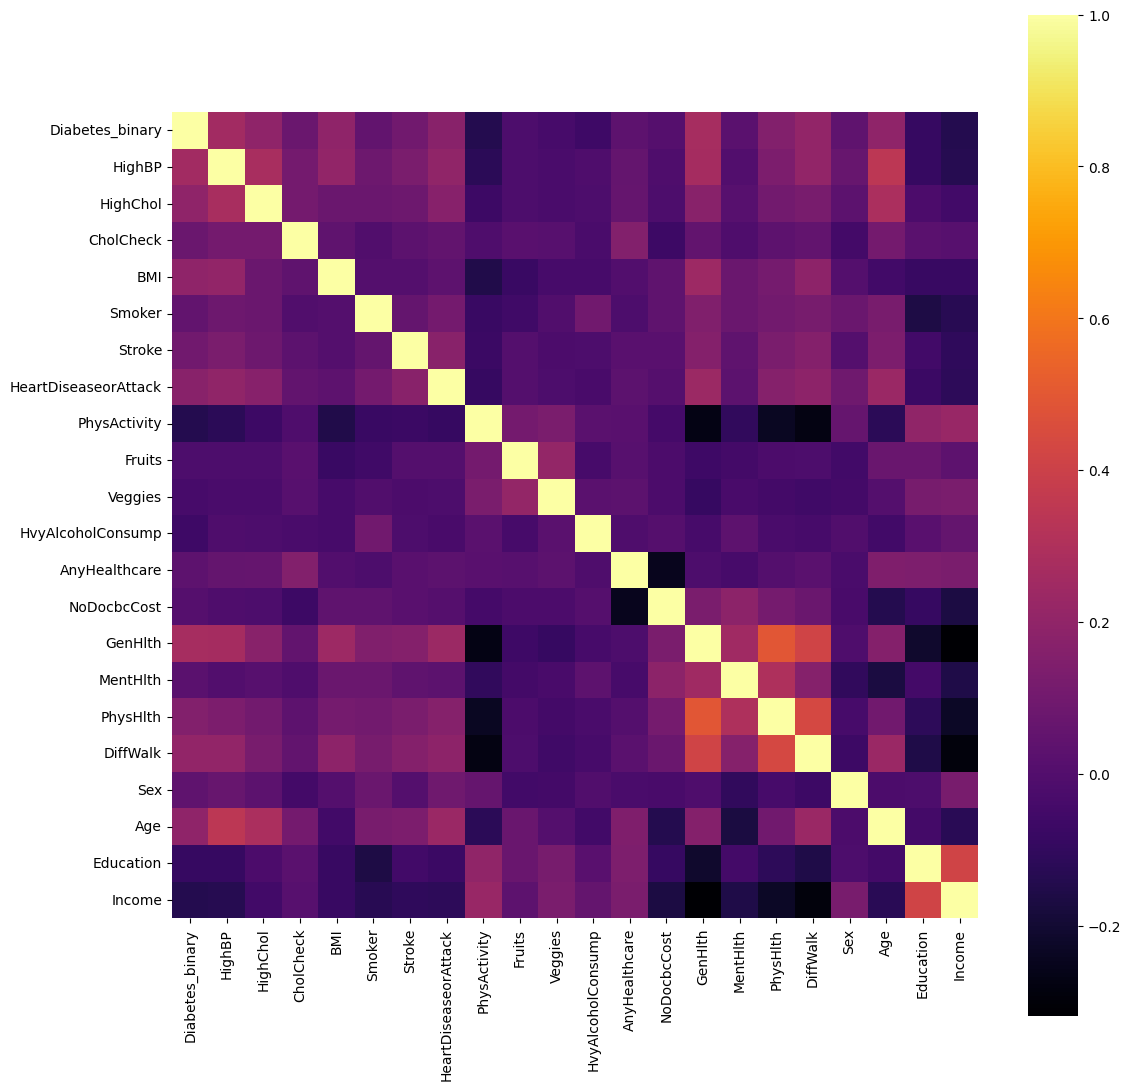

In [16]:
plt.figure(figsize = (13, 13))
sns.heatmap(dataset.corr(), square=True, cmap="inferno")

In [17]:
dataset['BMI'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    18.0
0.050    21.0
0.100    22.0
0.500    28.0
0.900    38.0
0.950    41.0
0.990    50.0
0.995    54.0
Name: BMI, dtype: float64

# Нормализация признаков

In [18]:
# метод стандартизации
features = dataset.drop('Diabetes_binary', axis=1)
target = dataset['Diabetes_binary']

features_standardized = (features - features.mean(axis=0)) / features.std(axis=0)
dsn = features_standardized.join(target)

# Классификатор

In [19]:
X = dsn.drop('Diabetes_binary', axis=1)
y = dsn['Diabetes_binary'].astype(int) 

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Вывод размерности полученных выборок
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (167432, 21)
X_test shape: (55811, 21)
y_train shape: (167432,)
y_test shape: (55811,)


Accuracy of KNN classifier on test set: 82.36%


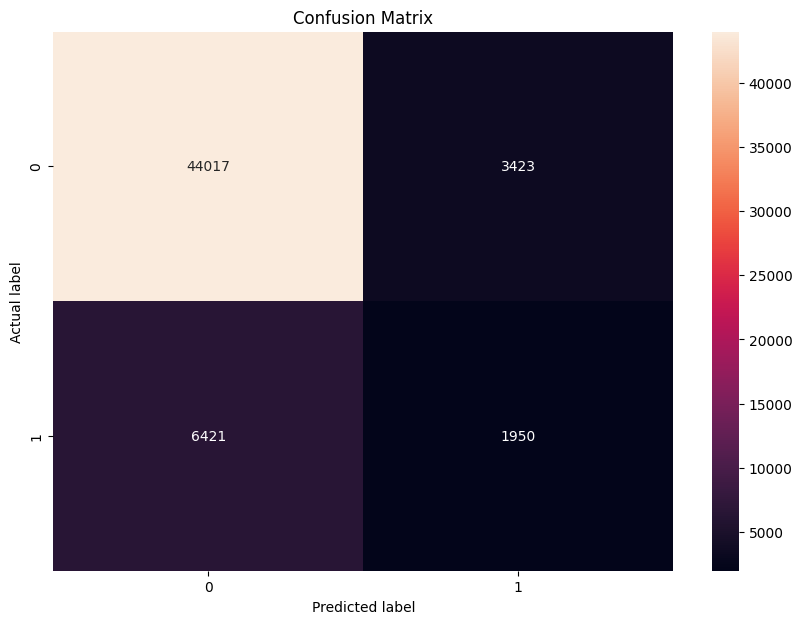

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN classifier on test set: {accuracy:.2%}')


conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy of KNN classifier on test set: 84.86%


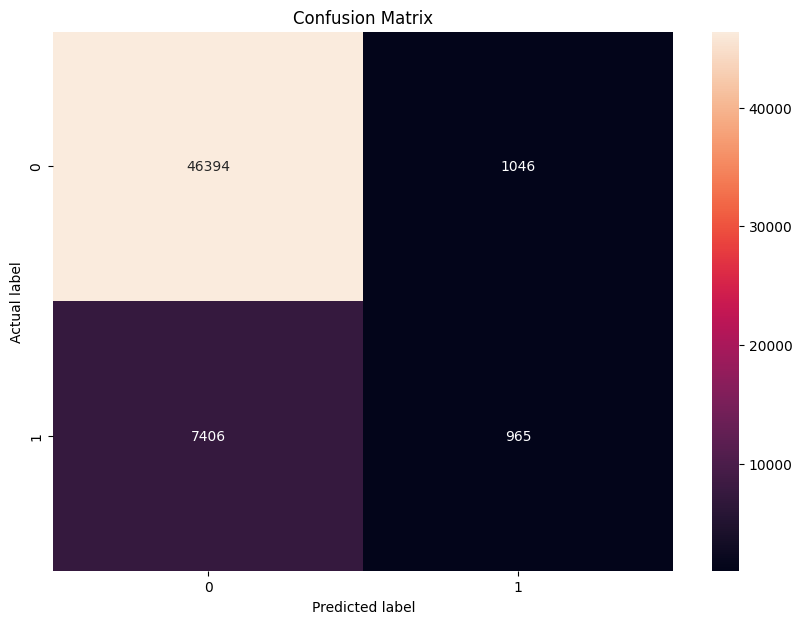

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN classifier on test set: {accuracy:.2%}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 11))}
grid_search = GridSearchCV(knn, param_grid, cv=5) 
grid_search.fit(X_train, y_train)
print(f'Лучшее значение параметра: {grid_search.best_params_}')
print(f'Лучшая оценка модели: {grid_search.best_score_}')
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(f'Точность лучшей модели k-NN на тестовых данных: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Лучшее значение параметра: {'n_neighbors': 10}
Лучшая оценка модели: 0.848923734652594
Точность лучшей модели k-NN на тестовых данных: 0.8485603196502481
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     47440
           1       0.48      0.12      0.19      8371

    accuracy                           0.85     55811
   macro avg       0.67      0.55      0.55     55811
weighted avg       0.80      0.85      0.81     55811



# Выводы

- Большее количество k-соседей имеет очень малое влияние на улучшение точности
- Модель достигает меньшей производительности на распознавании менее распространенного класса (диабет и предиабет), но хорошо распознаёт недиабет.
- Возможно, стоит использовать альтернативные методы классификации или сбалансировать классы.

# Домашняя работа №6

### Логистическая регрессия

Accuracy of Logic regression: 85.38%


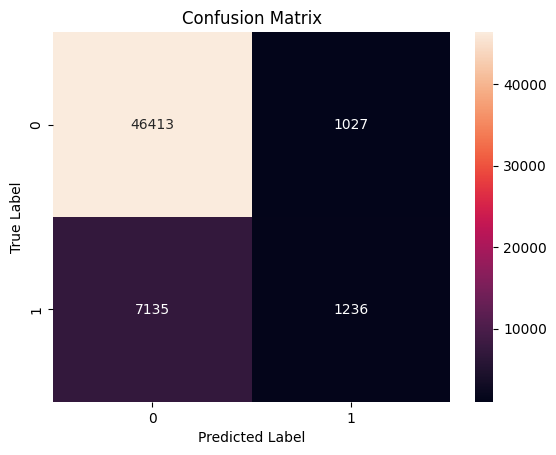

In [33]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logic regression: {accuracy:.2%}')

sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random forest

Accuracy of Random Forest classifier on test set: 84.73%


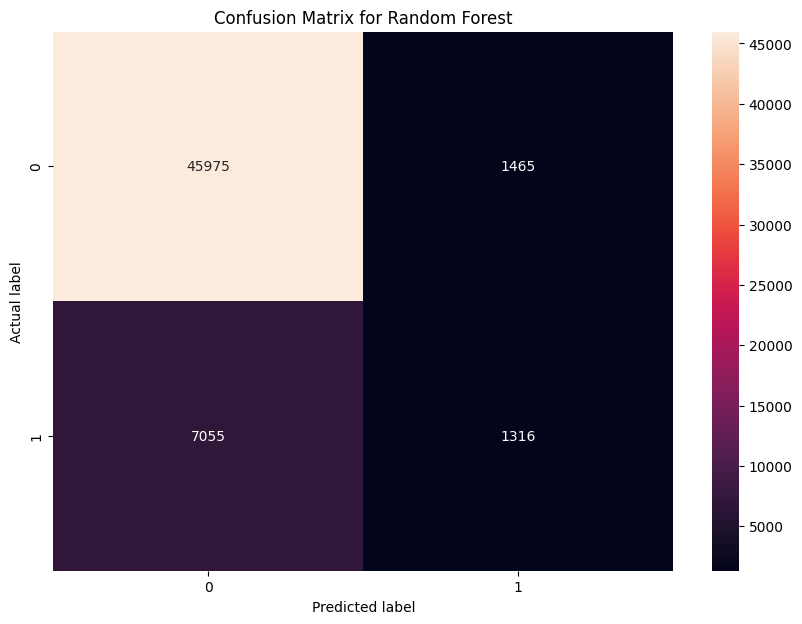

In [50]:
rf = RandomForestClassifier(random_state=42, n_estimators = 1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest classifier on test set: {accuracy:.2%}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Полносвязная двухслойная нейронная сеть

Epoch 1/50
5233/5233 [==============================] - 11s 2ms/step - loss: 0.3440 - accuracy: 0.8522 - val_loss: 0.3390 - val_accuracy: 0.8556
Epoch 2/50
5233/5233 [==============================] - 11s 2ms/step - loss: 0.3374 - accuracy: 0.8551 - val_loss: 0.3387 - val_accuracy: 0.8552
Epoch 3/50
5233/5233 [==============================] - 11s 2ms/step - loss: 0.3365 - accuracy: 0.8549 - val_loss: 0.3376 - val_accuracy: 0.8560
Epoch 4/50
5233/5233 [==============================] - 12s 2ms/step - loss: 0.3358 - accuracy: 0.8559 - val_loss: 0.3378 - val_accuracy: 0.8558
Epoch 5/50
5233/5233 [==============================] - 12s 2ms/step - loss: 0.3357 - accuracy: 0.8559 - val_loss: 0.3380 - val_accuracy: 0.8555
Epoch 6/50
5233/5233 [==============================] - 11s 2ms/step - loss: 0.3350 - accuracy: 0.8563 - val_loss: 0.3386 - val_accuracy: 0.8553
Epoch 7/50
5233/5233 [==============================] - 12s 2ms/step - loss: 0.3349 - accuracy: 0.8557 - val_loss: 0.3376 - val_ac

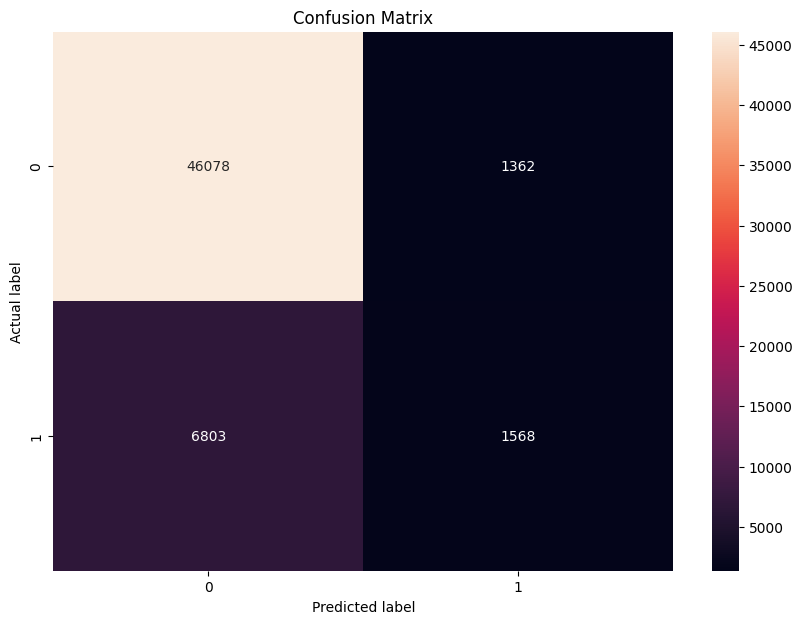

In [58]:
model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the neural network on test set: {accuracy:.2%}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()